<a href="https://colab.research.google.com/github/Kageliklambda/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Kagelik_Edmonds_9_6_DS_Unit_1_Sprint_Challenge_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#importing pandas 
import pandas as pd 

#Load the data as a pandas data frame
cancer_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
cancer_data = pd.read_csv(cancer_url)

#preview data to ensure it was read in
cancer_data.head()

In [4]:
#Validate that it has the appropriate number of observations should be 306 
cancer_data.count()

30     305
64     305
1      305
1.1    305
dtype: int64

In [6]:
#removing data from header
cancer_data = pd.read_csv(cancer_url, header=None)
cancer_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
#counting for proper number of observations should be 306
cancer_data.count()

0    306
1    306
2    306
3    306
dtype: int64

In [12]:
#Validate that you have no missing values
cancer_data.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [15]:
#Add informative names to the features
column_headers = ['age','year_of_op','nodes_detected','survival_status']

cancer_data = pd.read_csv(cancer_url, names=column_headers)
cancer_data.head()

,age,year_of_op,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [16]:
#The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
#change this to be 0 for not surviving and 1 for surviving >5 years 
#0/1 is a more traditional encoding of binary variables

cancer_data['survival_status'].replace([1,2],[0,1],inplace=True) 

#print first 5 rows 
cancer_data.head(5)

,age,year_of_op,nodes_detected,survival_status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

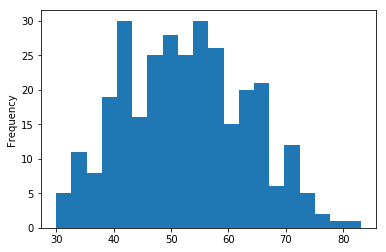

In [28]:
cancer_data['age'].plot.hist(bins=20);

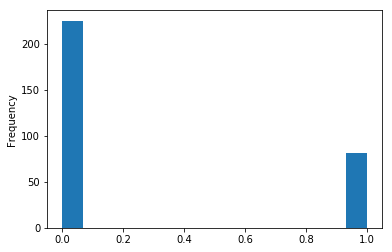

In [85]:
cancer_data['survival_status'].plot.hist(bins=15);

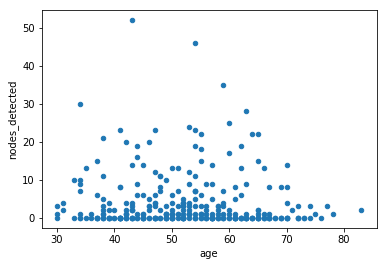

In [21]:
cancer_data.plot.scatter('age', 'nodes_detected');

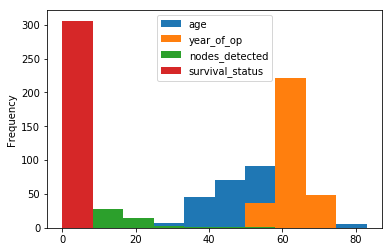

In [25]:
cancer_data.plot.hist('age');

In [0]:
#table for age and nodes detected
pd.crosstab(cancer_data['age'], cancer_data['nodes_detected'])

In [0]:
#table for age and survival status
pd.crosstab(cancer_data['age'], cancer_data['survival_status'])

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
#dataframe for individuals whos survived more than 5 years
survived = (cancer_data['survival_status'] == 0)
survived = cancer_data[survived].head(10)

In [101]:
survived.head(10)

,age,year_of_op,nodes_detected,survival_status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
9,34,58,30,0
10,34,60,1,0
11,34,61,10,0


In [0]:

age_bins = pd.cut(cancer_data['age'], 6)
nodes_bins= pd.cut(cancer_data['nodes_detected'], 6)
survival_bins = pd.cut(cancer_data['survival_status'], 6)  # 3 equal-sized bins

final = pd.crosstab(age_bins, survival_bins)

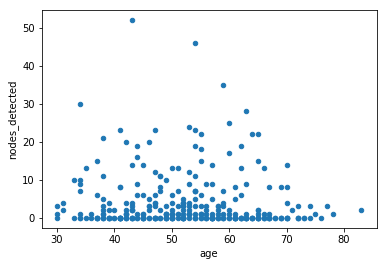

In [114]:
cancer_data.plot.scatter('age', 'nodes_detected');

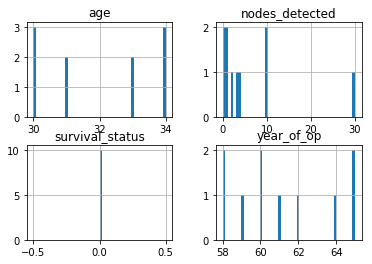

In [109]:
#personal reference to see data 
survived.hist(bins=50);

In [0]:
#personal reference to see data 
survived.plot.scatter('age', 'nodes_detected');

In [0]:
#dataframe for individuals who survived less than 5 years 

died = (cancer_data['survival_status'] == 1)
died = cancer_data[died].head(10)


In [0]:
#chart for nodes detected and survival 
crosstab_age_survival = cancer_data.iloc[:,[0,3]]
crosstab_age_survival

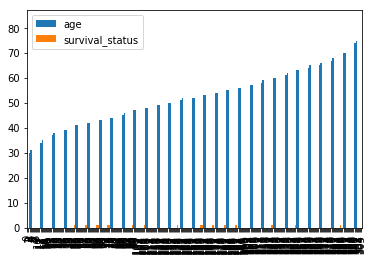

In [95]:
crosstab_age.plot(kind='bar');

In [0]:
crosstab_nodes_survival = cancer_data.iloc[:,[2,3]]
crosstab_nodes_survival

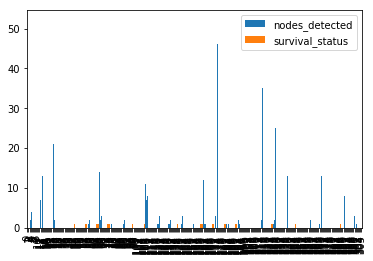

In [107]:
crosstab_nodes_survival.plot(kind='bar');

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

1. Age looks to have a negative relationship with survival. However I cant get a clear picture to interpret the graph so i may be reading it incorrectly. 

2. Nodes detected has a negative relationship with survival. 

3. Both features are not clear and I believe they have a confounding relationship. 

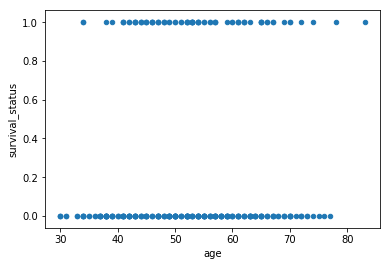

In [81]:
#? idk how to interpret this 
cancer_data.plot.scatter('age', 'survival_status');

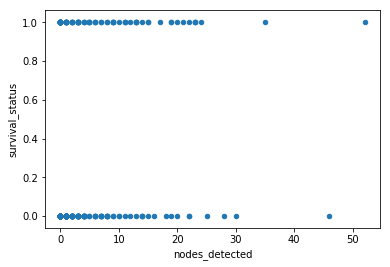

In [115]:
cancer_data.plot.scatter('nodes_detected', 'survival_status');

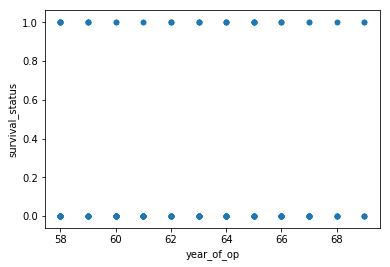

In [116]:
cancer_data.plot.scatter('year_of_op', 'survival_status');